In [61]:
import os
import argparse

import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt    
import itertools

"""
Metrics:
- Precision recall curve
- F1-score
- Confusion matrix
- Cosine similarity
- Accuracy 
- Sensitivity/specificity

""" 

# N_CLASSES = 6
# def plot_precision_recall_curve(y_true, y_pred):

#     precision = {}
#     recall = {}
#     for i in range(N_CLASSES):
#         precision[i], recall[i], _ = precision_recall_curve(y_true[i],
#                                                             y_pred[i])
#         plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

#     plt.xlabel("recall")
#     plt.ylabel("precision")
#     plt.legend(loc="best")
#     plt.title("precision vs. recall curve")
#     plt.show()
    
#     precision, recall, _ = precision_recall_curve(y_true, y_pred)
#     no_skill = len(y_true[y_true==1]) / len(y_true)
#     pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
#     pyplot.plot(recall, precision, marker='.', label='Model')
#     pyplot.xlabel('Recall')
#     pyplot.ylabel('Precision')
#     pyplot.legend()
#     pyplot.show()

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Taken from: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
    
    Given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
def f1_scores(y_true, y_pred):
    scores = {}
    scores["micro"] = f1_score(y_true, y_pred, average="micro")
    scores["macro"] = f1_score(y_true, y_pred, average="macro")
    scores["weighted"] = f1_score(y_true, y_pred, average="weighted")
    return scores

# def evaluate(y_true, y_pred, metric):
#     pass

# def full_evaluation(y_true, y_pred, experiment_name=None, store=False):
#     plot

# def evaluate_model(dataset_path, model_output_path, metric):
#     ground_truth = labels_from_dataset(dataset_path)
#     model_preds = read_model_output(model_output_path)
#     results_df = evaluate(ground_truth, model_preds, metric)
#     results_plots = plot_results(results_df)

    
# def plot_results(eval_results):
#     pass


# def main():

#     # Read command line arguments
#     parser = argparse.ArgumentParser()
#     parser.add_argument("-metric", type=str)
#     parser.add_argument("-model_name", type=str)
#     parser.add_argument("-model_output_path", type=str)
#     parser.add_argument("-dataset_path", type=str)
#     args = vars(parser.parse_args())

#     evaluate_model(args["dataset_path"], args["model_output_path"])
    

In [52]:
label_names = ["Direct payment (PES)", "Tax deduction", "Credit/guarantee", "Technical assistance", "Supplies", "Fine"]

y_true = np.random.randint(len(label_names), size=100)
y_pred = np.random.randint(len(label_names), size=100)

In [60]:
len(label_names)

6

In [53]:
y_true, y_pred

(array([0, 5, 1, 2, 5, 4, 2, 2, 5, 5, 0, 0, 4, 3, 0, 3, 0, 3, 5, 4, 0, 4,
        5, 2, 3, 0, 4, 5, 5, 2, 5, 5, 3, 3, 0, 4, 0, 5, 3, 3, 4, 1, 4, 2,
        3, 1, 3, 3, 3, 4, 5, 3, 2, 0, 5, 5, 1, 5, 1, 4, 5, 0, 3, 5, 2, 4,
        2, 1, 0, 3, 0, 0, 5, 2, 4, 3, 5, 3, 5, 5, 1, 3, 3, 2, 4, 5, 2, 1,
        2, 2, 5, 5, 1, 2, 0, 0, 1, 4, 0, 1]),
 array([2, 3, 3, 2, 0, 5, 0, 2, 5, 4, 5, 3, 0, 4, 2, 2, 3, 2, 1, 2, 3, 0,
        4, 4, 4, 0, 4, 4, 1, 5, 4, 4, 5, 4, 3, 0, 2, 4, 5, 2, 2, 5, 0, 1,
        0, 5, 2, 4, 0, 3, 2, 3, 5, 5, 5, 5, 3, 5, 3, 0, 1, 1, 5, 2, 4, 3,
        4, 3, 3, 0, 3, 3, 0, 1, 2, 2, 0, 1, 5, 3, 4, 1, 3, 0, 5, 1, 3, 5,
        3, 1, 5, 4, 1, 4, 0, 3, 0, 3, 0, 2]))

In [54]:
cm = confusion_matrix(y_true, y_pred)

In [55]:
cm

array([[3, 1, 3, 8, 0, 2],
       [1, 1, 1, 4, 1, 3],
       [2, 3, 2, 2, 4, 2],
       [3, 2, 5, 2, 4, 3],
       [5, 0, 3, 3, 1, 2],
       [3, 4, 2, 2, 7, 6]])

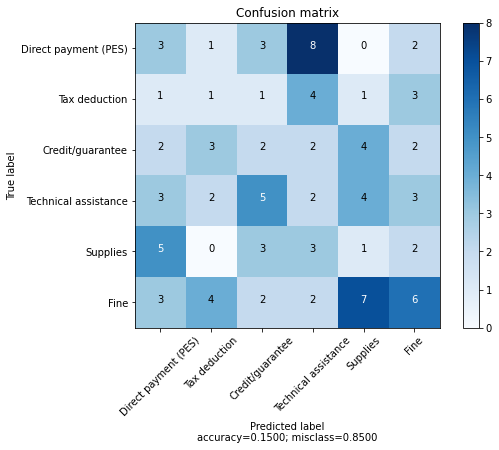

In [56]:
plot_confusion_matrix(cm,
                      label_names,
                      title='Confusion matrix',
                      cmap=None,
                      normalize=False)

(0.15, 0.14110705865924086, 0.15595852534562213)